# Task 4a

In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10_for_resnet18
from trainer import Trainer, compute_loss_and_accuracy
from plot_utils import create_plots

In [2]:
epochs = 10
batch_size = 32
learning_rate = 5e-4
early_stop_count = 4
dataloaders = load_cifar10_for_resnet18(batch_size)

from models import ResNet18
model = ResNet18()
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.optimizer = torch.optim.Adam(model.parameters())
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
ResNet18(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   

## Stats

In [3]:
final_train_loss, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
final_val_loss, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
final_test_loss, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")
print(f"Train Loss: {final_train_loss:.3f}, Validation Loss: {final_val_loss:.3f}, Test Loss: {final_test_loss:.3f}")

Train Accuracy: 0.979, Validation Accuracy: 0.894, Test Accuracy: 0.890
Train Loss: 0.064, Validation Loss: 0.358, Test Loss: 0.391


## Plots

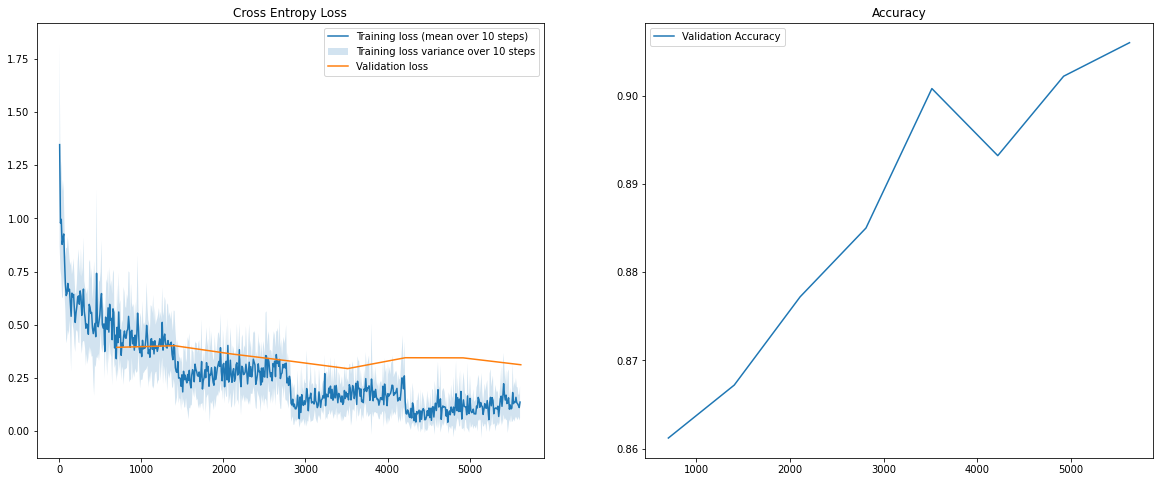

In [4]:
create_plots(trainer, "task4a")

# Continuation of Task 4

We were presented with some boilerplate code for performing task 4b and 4c. I added the weight for task 4b.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
image = Image.open("images/zebra.jpg")
print("Image shape:", image.size)

model = torchvision.models.resnet18(pretrained=True)
print(model)
first_conv_layer = model.conv1
print("First conv layer weight shape:", first_conv_layer.weight.shape)
print("First conv layer:", first_conv_layer)

# Resize, and normalize the image with the mean and standard deviation
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image = image_transform(image)[None]
print("Image shape:", image.shape)

activation = first_conv_layer(image)
print("Activation shape:", activation.shape)

weight = model.conv1.weight.data.cpu()
print("Filter/Weight/kernel size:", weight.shape)

def torch_image_to_numpy(image: torch.Tensor):
    """
    Function to transform a pytorch tensor to numpy image
    Args:
        image: shape=[3, height, width]
    Returns:
        iamge: shape=[height, width, 3] in the range [0, 1]
    """
    # Normalize to [0 - 1.0]
    image = image.detach().cpu()  # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2:  # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, "Expected color channel to be on first axis. Got: {}".format(
        image.shape)
    image = np.moveaxis(image, 0, 2)
    return image

Image shape: (224, 224)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu

## Task 4b

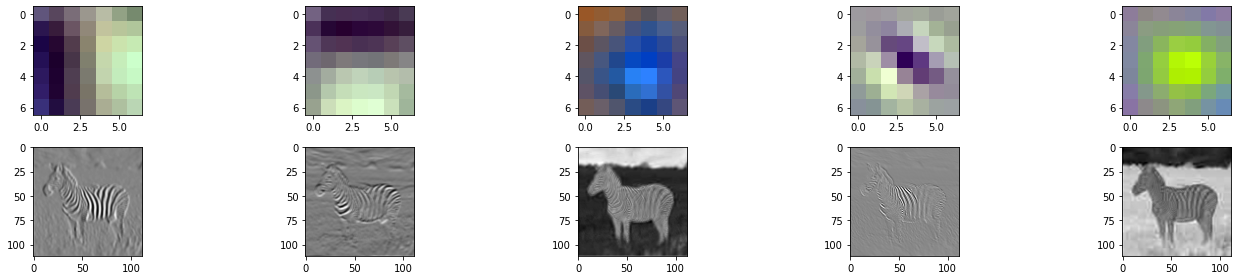

In [3]:
# indices = [0, 1, 2, 3, 14]  # Test
indices = [14, 26, 32, 49, 52]
num_filters = len(indices)
fig, ax = plt.subplots(2, num_filters, figsize=(20, 4))
n = 0
for i in indices:
    ax[0, n].imshow(torch_image_to_numpy(weight[i]))
    ax[1, n].imshow(torch_image_to_numpy(activation[0, i]), cmap="gray")
    n += 1
fig.tight_layout()
plt.savefig("plots/task4b_plot.png")
plt.show()

## Task 4c

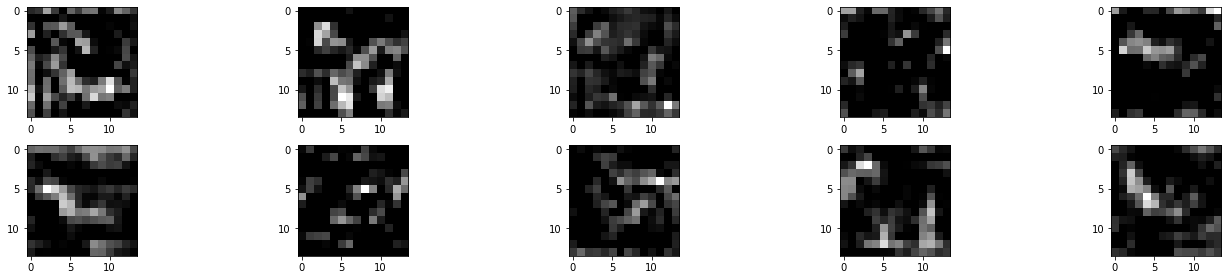

In [4]:
# Third last layer is the last conv layer, so we remove the last layers before we take a forward pass
last_conv_layer = torch.nn.Sequential(*list(model.children())[:-3])
activation = last_conv_layer.forward(image)
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(20, 4))
for i, id in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    image_activation = torch_image_to_numpy(activation[0, id, :, :])
    plt.imshow(image_activation, cmap="gray")
plt.tight_layout()
plt.savefig("images/task4c_plot.png")
plt.show()